# ŒëŒΩŒ¨ŒªœÖœÉŒ∑ ŒìŒøŒΩŒπŒ¥ŒπŒ±Œ∫ŒÆœÇ ŒàŒ∫œÜœÅŒ±œÉŒ∑œÇ Œ±œÄœå GEO (ŒöŒ±œÅŒ∫ŒØŒΩŒøœÇ Œ†ŒΩŒµœçŒºŒøŒΩŒ±) ŒëŒΩŒ¨ŒªœÖœÉŒ∑ Œ¥ŒµŒ¥ŒøŒºŒ≠ŒΩœâŒΩ Œ±œÄœå GEO datasets (GSE31210, GSE19804) ŒºŒµ œÉœÑœåœáŒø œÑŒ∑ŒΩ œÑŒ±œÖœÑŒøœÄŒøŒØŒ∑œÉŒ∑ œÉŒ∑ŒºŒ±ŒΩœÑŒπŒ∫œéŒΩ Œ≥ŒøŒΩŒπŒ¥ŒØœâŒΩ œÉœÑŒøŒΩ Œ∫Œ±œÅŒ∫ŒØŒΩŒø œÑŒøœÖ œÄŒΩŒµœçŒºŒøŒΩŒ±.


# Œ¶œåœÅœÑœâœÉŒ∑ GEO Datasets

In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


In [4]:
# Œ¶œåœÅœÑœâœÉŒ∑ datasets
df1 = pd.read_csv("https://ftp.ncbi.nlm.nih.gov/geo/series/GSE31nnn/GSE31210/matrix/GSE31210_series_matrix.txt.gz",
                  compression='gzip', sep='\t', comment='!', low_memory=False)

df2 = pd.read_csv("https://ftp.ncbi.nlm.nih.gov/geo/series/GSE19nnn/GSE19804/matrix/GSE19804_series_matrix.txt.gz",
                  compression='gzip', sep='\t', comment='!', low_memory=False)

# ŒïœçœÅŒµœÉŒ∑ ŒöŒøŒπŒΩœéŒΩ ŒìŒøŒΩŒπŒ¥ŒØœâŒΩ Œ∫Œ±Œπ Œ†œÅŒøŒµœÄŒµŒæŒµœÅŒ≥Œ±œÉŒØŒ±

In [5]:
# ŒíŒµŒ≤Œ±ŒπœéŒΩŒøœÖŒºŒµ œåœÑŒπ Œ∑ œÄœÅœéœÑŒ∑ œÉœÑŒÆŒªŒ∑ (ID_REF) ŒµŒØŒΩŒ±Œπ Œ∫ŒøŒπŒΩŒÆ Œ∫Œ±Œπ œÉœÑŒ± œÑœÅŒØŒ± datasets
genes_1 = set(df1['ID_REF'])
genes_2 = set(df2['ID_REF'])

In [6]:
common_genes = genes_1.intersection(genes_2)

In [7]:
# Œ¶ŒπŒªœÑœÅŒ¨œÅŒπœÉŒºŒ± œÑœâŒΩ datasets ŒºœåŒΩŒø Œ≥ŒπŒ± Œ∫ŒøŒπŒΩŒ¨ Œ≥ŒøŒΩŒØŒ¥ŒπŒ±
df1_filtered = df1[df1['ID_REF'].isin(common_genes)].set_index('ID_REF')
df2_filtered = df2[df2['ID_REF'].isin(common_genes)].set_index('ID_REF')

In [8]:
# Œ§Œ±ŒæŒπŒΩœåŒºŒ∑œÉŒ∑ index œéœÉœÑŒµ ŒΩŒ± ŒµŒØŒΩŒ±Œπ Œ±Œ∫œÅŒπŒ≤œéœÇ ŒØŒ¥ŒπŒ± œÉŒµŒπœÅŒ¨
df1_filtered = df1[df1['ID_REF'].isin(common_genes)].set_index('ID_REF').sort_index()
df2_filtered = df2_filtered.sort_index()

In [9]:
# Œ§ŒµŒªŒπŒ∫œåœÇ Œ≠ŒªŒµŒ≥œáŒøœÇ Œ≥ŒπŒ± œÑŒ∑ŒΩ œÑŒ±œçœÑŒπœÉŒ∑ index
assert all(df1_filtered.index == df2_filtered.index)

In [10]:
# Œ£œÖŒΩŒ≠ŒΩœâœÉŒ∑ œÑœâŒΩ Œ¥ŒµŒ¥ŒøŒºŒ≠ŒΩœâŒΩ
df_combined = pd.concat([df1_filtered, df2_filtered,], axis=1)

# ŒàŒªŒµŒ≥œáŒøœÇ Œ§œçœÄŒøœÖ ŒëŒΩŒ±Œ≥ŒΩœâœÅŒπœÉœÑŒπŒ∫œéŒΩ (ID_REF)

In [11]:
print("GSE43458 IDs:", df1['ID_REF'].head())
print("GSE31210 IDs:", df2['ID_REF'].head())



GSE43458 IDs: 0    1007_s_at
1      1053_at
2       117_at
3       121_at
4    1255_g_at
Name: ID_REF, dtype: object
GSE31210 IDs: 0    1007_s_at
1      1053_at
2       117_at
3       121_at
4    1255_g_at
Name: ID_REF, dtype: object


# ŒúŒµœÑŒ±œÑœÅŒøœÄŒÆ ŒëŒΩŒ±Œ≥ŒΩœâœÅŒπœÉœÑŒπŒ∫œéŒΩ œÉŒµ Gene Symbols

In [12]:
# Œ¶œåœÅœÑœâœÉŒµ œÑŒø Œ±œÅœáŒµŒØŒø œÄŒøœÖ Œ∫Œ±œÑŒ≠Œ≤Œ±œÉŒµœÇ
annotation = pd.read_csv("datasets\GPL570-55999.txt", sep="\t", comment='#', low_memory=False)

# ŒîŒµœÇ œÄŒøŒπŒµœÇ œÉœÑŒÆŒªŒµœÇ Œ≠œáŒµŒπ
print(annotation.columns)


<>:2: SyntaxWarning: invalid escape sequence '\G'
<>:2: SyntaxWarning: invalid escape sequence '\G'
C:\Users\stama\AppData\Local\Temp\ipykernel_7672\1899038321.py:2: SyntaxWarning: invalid escape sequence '\G'
  annotation = pd.read_csv("datasets\GPL570-55999.txt", sep="\t", comment='#', low_memory=False)


Index(['ID', 'GB_ACC', 'SPOT_ID', 'Species Scientific Name', 'Annotation Date',
       'Sequence Type', 'Sequence Source', 'Target Description',
       'Representative Public ID', 'Gene Title', 'Gene Symbol',
       'ENTREZ_GENE_ID', 'RefSeq Transcript ID',
       'Gene Ontology Biological Process', 'Gene Ontology Cellular Component',
       'Gene Ontology Molecular Function'],
      dtype='object')


In [13]:
# ŒîŒ∑ŒºŒπŒøœÖœÅŒ≥ŒøœçŒºŒµ Œ≠ŒΩŒ± ŒªŒµŒæŒπŒ∫œå probe ‚Üí gene
id_to_gene = dict(zip(annotation['ID'], annotation['Gene Symbol']))

# ŒïœÜŒ±œÅŒºœåŒ∂ŒµŒπœÇ Œ±œÖœÑœå œÑŒø mapping œÉœÑŒ± datasets GSE31210 Œ∫Œ±Œπ GSE19804
df2['Gene_Symbol'] = df2['ID_REF'].map(id_to_gene)
df1['Gene_Symbol'] = df1['ID_REF'].map(id_to_gene)


# ŒüŒºŒ±Œ¥ŒøœÄŒøŒØŒ∑œÉŒ∑ ŒëŒΩŒ¨ ŒìŒøŒΩŒØŒ¥ŒπŒø Œ∫Œ±Œπ Œ•œÄŒøŒªŒøŒ≥ŒπœÉŒºœåœÇ ŒàŒ∫œÜœÅŒ±œÉŒ∑œÇ


In [14]:
# ŒíŒÆŒºŒ± 1: ŒöœÅŒ±œÑŒ¨ŒºŒµ ŒºœåŒΩŒø œÑŒπœÇ Œ±œÅŒπŒ∏ŒºŒ∑œÑŒπŒ∫Œ≠œÇ œÉœÑŒÆŒªŒµœÇ (Œ¥Œ∑ŒªŒ±Œ¥ŒÆ œÑŒ± Œ¥ŒµŒØŒ≥ŒºŒ±œÑŒ±)
df2_numeric = df2.select_dtypes(include='number')
df1_numeric = df1.select_dtypes(include='number')

# ŒíŒÆŒºŒ± 2: Œ†œÅŒøœÉŒ∏Œ≠œÑŒøœÖŒºŒµ ŒæŒ±ŒΩŒ¨ œÑŒ± gene symbols œâœÇ œÉœÑŒÆŒªŒ∑
df2_numeric['Gene_Symbol'] = df2['Gene_Symbol']
df1_numeric['Gene_Symbol'] = df1['Gene_Symbol']

# ŒíŒÆŒºŒ± 3: ŒöŒ¨ŒΩŒøœÖŒºŒµ groupby Œ∫Œ±Œπ œÖœÄŒøŒªŒøŒ≥ŒØŒ∂ŒøœÖŒºŒµ œÑŒøŒΩ ŒºŒ≠œÉŒø œåœÅŒø Œ≥ŒπŒ± Œ∫Œ¨Œ∏Œµ Œ≥ŒøŒΩŒØŒ¥ŒπŒø
df2_grouped = df2_numeric.groupby('Gene_Symbol').mean()
df1_grouped = df1_numeric.groupby('Gene_Symbol').mean()


# Œ§ŒµŒªŒπŒ∫ŒÆ Œ£œÖŒΩŒ≠ŒΩœâœÉŒ∑ ŒåŒªœâŒΩ œÑœâŒΩ ŒîŒµŒ¥ŒøŒºŒ≠ŒΩœâŒΩ


In [15]:
# Œ£œÖŒΩŒ≠ŒΩœâœÉŒ∑ Œ∫Œ±œÑŒ¨ Œ≥ŒøŒΩŒØŒ¥ŒπŒø (Œ≥œÅŒ±ŒºŒºŒ≠œÇ), ŒøŒπ œÉœÑŒÆŒªŒµœÇ (Œ¥ŒµŒØŒ≥ŒºŒ±œÑŒ±) Œ¥ŒµŒΩ ŒµœÄŒ±ŒΩŒ±ŒªŒ±ŒºŒ≤Œ¨ŒΩŒøŒΩœÑŒ±Œπ
combined_df = pd.concat([df2_grouped, df1_grouped], axis=1)

# ŒîŒµœÇ œÑŒπ œÜœÑŒπŒ¨ŒæŒ±ŒºŒµ
print(combined_df.shape)
combined_df.head()


(23520, 366)


GSM494556  GSM494557  GSM494558  GSM494559  GSM494560  GSM494561  \
Gene_Symbol                                                                     
A1BG          6.376000   6.514450   6.935300   7.987240   7.931680   7.531040   
A1BG-AS1      5.315020   5.032750   5.461360   5.812140   5.953150   5.800370   
A1CF          7.397725   5.081705   4.759180   4.592725   4.652410   4.582735   
A2M           9.548500   9.202655   9.744765   9.553915   9.420875   9.600145   
A2M-AS1       6.206260   6.284620   8.054770   5.698790   6.214340   6.526420   

             GSM494562  GSM494563  GSM494564  GSM494565  ...    GSM773776  \
Gene_Symbol                                              ...                
A1BG          6.922500   7.628280    7.24020   7.267070  ...    50.813641   
A1BG-AS1      5.302210   5.581330    5.49403   5.342650  ...    61.151523   
A1CF          4.886370   4.365795    4.51583   4.965115  ...    25.849430   
A2M           8.897035   8.928620    9.50293   9.243995  ...  8782.817786   
A2M-AS1       4.727290   6.217280    7.03301   5.977370  ...   295.488500   

               GSM773777    GSM773778    GSM773779    GSM773780    GSM773781  \
Gene_Symbol                                                                    
A1BG           51.982870    46.984982    24.260811    50.404438    52.734867   
A1BG-AS1       76.560795    91.945839    68.984255     7.022719    51.320599   
A1CF           33.761611    47.827019    42.357287    26.442560    46.527127   
A2M          9298.270346  9957.928594  9745.025715  9916.936047  9662.780993   
A2M-AS1       392.521100   373.392300   363.744200   279.185600   327.063400   

                GSM773782     GSM773783    GSM773784     GSM773785  
Gene_Symbol                                                         
A1BG            52.912245     43.067164    40.169184      7.322948  
A1BG-AS1        14.745603     64.812755   119.829274      8.107551  
A1CF            33.422373     51.864429    31.129011     41.863779  
A2M          10082.322964  13647.352951  7967.622052  10045.380457  
A2M-AS1        473.129400    420.205500   284.472400    460.258800  

[5 rows x 366 columns]

# œÜŒøœÅœÑœéœÉŒ∑ Œ¥ŒµŒ¥ŒøŒºŒ≠ŒΩœâŒΩ Œ∫Œ±Œπ ŒøœÅŒ≥Œ¨ŒΩœâœÉŒ∑ Œ≥ŒπŒ± Œ±ŒΩŒ¨ŒªœÖœÉŒ∑

In [16]:
# ŒîŒπŒ±Œ≤Œ¨Œ∂ŒµŒπ œÑŒ± sample IDs
def load_clean_ids(path):
    with open(path, 'r') as f:
        return [line.strip().replace('"', '') for line in f if line.strip()]

cancer_samples = load_clean_ids(r"cancer-normal/cancer.txt")
normal_samples = load_clean_ids(r"cancer-normal/normal.txt")

# Œ¶ŒπŒªœÑœÅŒ¨œÅŒµŒπ œåœÉŒ± œÖœÄŒ¨œÅœáŒøœÖŒΩ œÉœÑŒø combined_df
cancer_samples = [s for s in cancer_samples if s in combined_df.columns]
normal_samples = [s for s in normal_samples if s in combined_df.columns]

print(f"ŒöŒ±œÅŒ∫ŒπŒΩŒπŒ∫Œ¨ Œ¥ŒµŒØŒ≥ŒºŒ±œÑŒ±: {len(cancer_samples)}")
print(f"Œ¶œÖœÉŒπŒøŒªŒøŒ≥ŒπŒ∫Œ¨ Œ¥ŒµŒØŒ≥ŒºŒ±œÑŒ±: {len(normal_samples)}")


labels = pd.Series(
    ['cancer'] * len(cancer_samples) + ['normal'] * len(normal_samples),
    index=cancer_samples + normal_samples,
    name='label'
)

# Œ§ŒµŒªŒπŒ∫œå dataset (Œ¥ŒµŒØŒ≥ŒºŒ±œÑŒ± x Œ≥ŒøŒΩŒØŒ¥ŒπŒ± + label)
expression_data = combined_df[cancer_samples + normal_samples].T
expression_data['label'] = labels

# ‚úÖ ŒïœÄŒπŒ≤ŒµŒ≤Œ±ŒØœâœÉŒ∑
print("Œ§ŒµŒªŒπŒ∫œå œÉœáŒÆŒºŒ±:", expression_data.shape)
expression_data.head()


ŒöŒ±œÅŒ∫ŒπŒΩŒπŒ∫Œ¨ Œ¥ŒµŒØŒ≥ŒºŒ±œÑŒ±: 286
Œ¶œÖœÉŒπŒøŒªŒøŒ≥ŒπŒ∫Œ¨ Œ¥ŒµŒØŒ≥ŒºŒ±œÑŒ±: 80
Œ§ŒµŒªŒπŒ∫œå œÉœáŒÆŒºŒ±: (366, 23521)


Gene_Symbol      A1BG   A1BG-AS1       A1CF          A2M    A2M-AS1  \
GSM773540    47.90095  46.825111  72.714534  2228.911570  175.34674   
GSM773541    51.64328   8.059568  23.870435  4198.206655  142.80260   
GSM773542    40.98813  10.234848  13.798074  4695.593220  142.81548   
GSM773543    28.38625   8.138013  40.220118  6329.205170  106.75270   
GSM773544    42.09003  10.482582  26.090287  3881.230130  240.99803   

Gene_Symbol      A2ML1      A2MP1     A4GALT      A4GNT        AA06  ...  \
GSM773540    22.831965  15.927107  12.925406  73.018596  101.416950  ...   
GSM773541    23.447401  31.932787  12.202017  46.112976   68.965219  ...   
GSM773542    11.082931  31.783636  40.485352  51.898190   50.386010  ...   
GSM773543    16.412923  39.129192  32.542745  19.044909   31.693239  ...   
GSM773544    17.330212  23.747617  16.267970  32.913082   51.031890  ...   

Gene_Symbol       ZYG11B        ZYX       ZZEF1        ZZZ3  \
GSM773540    1030.160047  167.89290  345.420567   778.35785   
GSM773541    2070.380533  487.50920  137.000604  1601.05855   
GSM773542    1690.349143  384.43770  227.002517  1343.98745   
GSM773543    2315.690700  330.22475  200.465752  1483.14315   
GSM773544    1500.671390  274.26120  296.169413  1095.84360   

Gene_Symbol  abParts /// IGKC /// IGKV4-1 /// IGKV4-1  \
GSM773540                                    6.886894   
GSM773541                                  528.101930   
GSM773542                                  210.150816   
GSM773543                                  262.979570   
GSM773544                                  609.263698   

Gene_Symbol  av27s1 /// TRAV39 /// TRAV39  \
GSM773540                       22.436699   
GSM773541                        4.380360   
GSM773542                        6.839572   
GSM773543                       27.579258   
GSM773544                       10.045916   

Gene_Symbol  hsa-let-7a-3 /// hsa-let-7b /// hsa-mir-4763 /// MIRLET7BHG /// RP4-695O20__B.10  \
GSM773540                                            13.242170                                  
GSM773541                                             4.805737                                  
GSM773542                                             3.302328                                  
GSM773543                                             9.878414                                  
GSM773544                                             2.294671                                  

Gene_Symbol  hsa-let-7a-3 /// hsa-let-7b /// hsa-mir-4763 /// RP4-695O20__B.10  \
GSM773540                                            111.81361                   
GSM773541                                             46.92550                   
GSM773542                                             62.00354                   
GSM773543                                             83.47410                   
GSM773544                                             75.77886                   

Gene_Symbol     mir-223   label  
GSM773540     13.521504  cancer  
GSM773541    105.879995  cancer  
GSM773542    205.846188  cancer  
GSM773543     21.877117  cancer  
GSM773544     17.893558  cancer  

[5 rows x 23521 columns]

# PCA

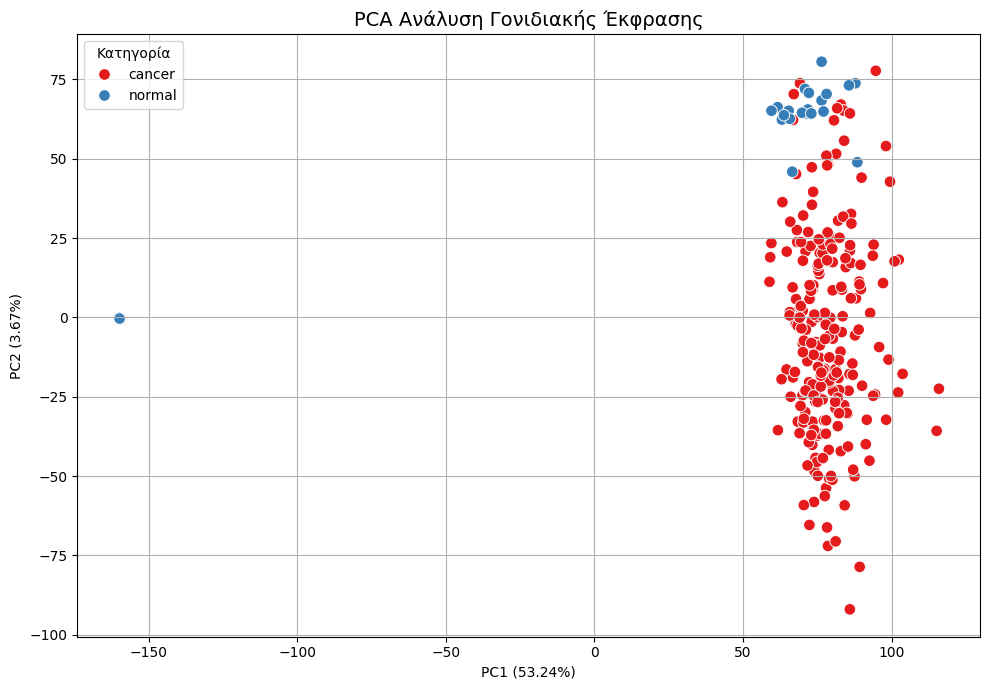

In [17]:
# üîπ ŒßœâœÅŒØŒ∂ŒøœÖŒºŒµ features & labels
X = expression_data.drop(columns=['label'])
y = expression_data['label']

# üîπ ŒöŒ±ŒΩŒøŒΩŒπŒ∫ŒøœÄŒøŒØŒ∑œÉŒ∑
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# üîπ PCA ŒºŒµ 2 œÉœÖŒΩŒπœÉœÑœéœÉŒµœÇ
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# üîπ ŒîŒ∑ŒºŒπŒøœÖœÅŒ≥ŒØŒ± DataFrame Œ≥ŒπŒ± plot
pca_df = pd.DataFrame(data=X_pca, columns=["PC1", "PC2"])
pca_df["label"] = y.values

# üîπ ŒüœÄœÑŒπŒ∫ŒøœÄŒøŒØŒ∑œÉŒ∑
plt.figure(figsize=(10,7))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="label", palette="Set1", s=70)
plt.title("PCA ŒëŒΩŒ¨ŒªœÖœÉŒ∑ ŒìŒøŒΩŒπŒ¥ŒπŒ±Œ∫ŒÆœÇ ŒàŒ∫œÜœÅŒ±œÉŒ∑œÇ", fontsize=14)
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)")
plt.legend(title="ŒöŒ±œÑŒ∑Œ≥ŒøœÅŒØŒ±")
plt.grid(True)
plt.tight_layout()
plt.show()


# Œ†œÅŒøŒµœÑŒøŒπŒºŒ±œÉŒØŒ± Œ∫Œ±Œπ ŒµŒ∫œÑŒ≠ŒªŒµœÉŒ∑ t-test

In [18]:
# ŒûŒµœáœâœÅŒØŒ∂ŒøœÖŒºŒµ Œ¥ŒµŒ¥ŒøŒºŒ≠ŒΩŒ± Œ±ŒΩŒ¨ ŒøŒºŒ¨Œ¥Œ±
cancer_data = expression_data[expression_data['label'] == 'cancer'].drop('label', axis=1)
normal_data = expression_data[expression_data['label'] == 'normal'].drop('label', axis=1)

# ŒëœÅœáŒπŒ∫ŒøœÄŒøŒØŒ∑œÉŒ∑ ŒªŒØœÉœÑŒ±œÇ Œ≥ŒπŒ± Œ±œÄŒøœÑŒµŒªŒ≠œÉŒºŒ±œÑŒ±
results = []

# T-test Œ≥ŒπŒ± Œ∫Œ¨Œ∏Œµ Œ≥ŒøŒΩŒØŒ¥ŒπŒø
for gene in expression_data.columns[:-1]:  # Œ±œÜŒ±ŒπœÅŒøœçŒºŒµ œÑŒ∑ œÉœÑŒÆŒªŒ∑ "label"
    # t-test ŒºŒµœÑŒ±Œæœç ŒøŒºŒ¨Œ¥œâŒΩ
    t_stat, p_value = stats.ttest_ind(cancer_data[gene], normal_data[gene], equal_var=False)

    # Œ•œÄŒøŒªŒøŒ≥ŒπœÉŒºœåœÇ fold change (mean cancer / mean normal)
    mean_cancer = np.mean(cancer_data[gene])
    mean_normal = np.mean(normal_data[gene])
    fold_change = mean_cancer / mean_normal if mean_normal != 0 else np.nan

    # ŒëœÄŒøŒ∏ŒÆŒ∫ŒµœÖœÉŒ∑ Œ±œÄŒøœÑŒµŒªŒµœÉŒºŒ¨œÑœâŒΩ
    results.append({
        'Gene': gene,
        'p-value': p_value,
        'Fold Change': fold_change,
        'log2(Fold Change)': np.log2(fold_change) if fold_change > 0 else np.nan
    })

# ŒúŒµœÑŒ±œÑœÅŒøœÄŒÆ œÉŒµ DataFrame Œ∫Œ±Œπ œÑŒ±ŒæŒπŒΩœåŒºŒ∑œÉŒ∑ Œ∫Œ±œÑŒ¨ p-value
deg_results = pd.DataFrame(results)
deg_results = deg_results.sort_values(by='p-value')

# ŒëœÄŒøŒ∏ŒÆŒ∫ŒµœÖœÉŒ∑ Œ±œÄŒøœÑŒµŒªŒµœÉŒºŒ¨œÑœâŒΩ (œÄœÅŒøŒ±ŒπœÅŒµœÑŒπŒ∫œå)
deg_results.to_csv('DEG_results.csv', index=False)

deg_results.head(10)

Gene       p-value  Fold Change  log2(Fold Change)
14874    OCIAD2  2.173729e-60    14.383767           3.846370
65        ABCC3  1.176171e-56    18.971748           4.245781
1259   ARHGEF16  3.016604e-54     7.857011           2.973981
21058     TMED3  6.857149e-54     7.579829           2.922165
3358       CD24  1.008358e-53    11.058760           3.467118
5758      EFNA4  1.869009e-53     6.942767           2.795511
22354      VMP1  3.150950e-53     8.804873           3.138302
7263     GALNT7  3.280343e-53     9.379638           3.229532
16783     PYCR1  5.555090e-53     8.194952           3.034735
5336     DNAH14  5.727165e-53     6.865796           2.779427

# Volcano plot

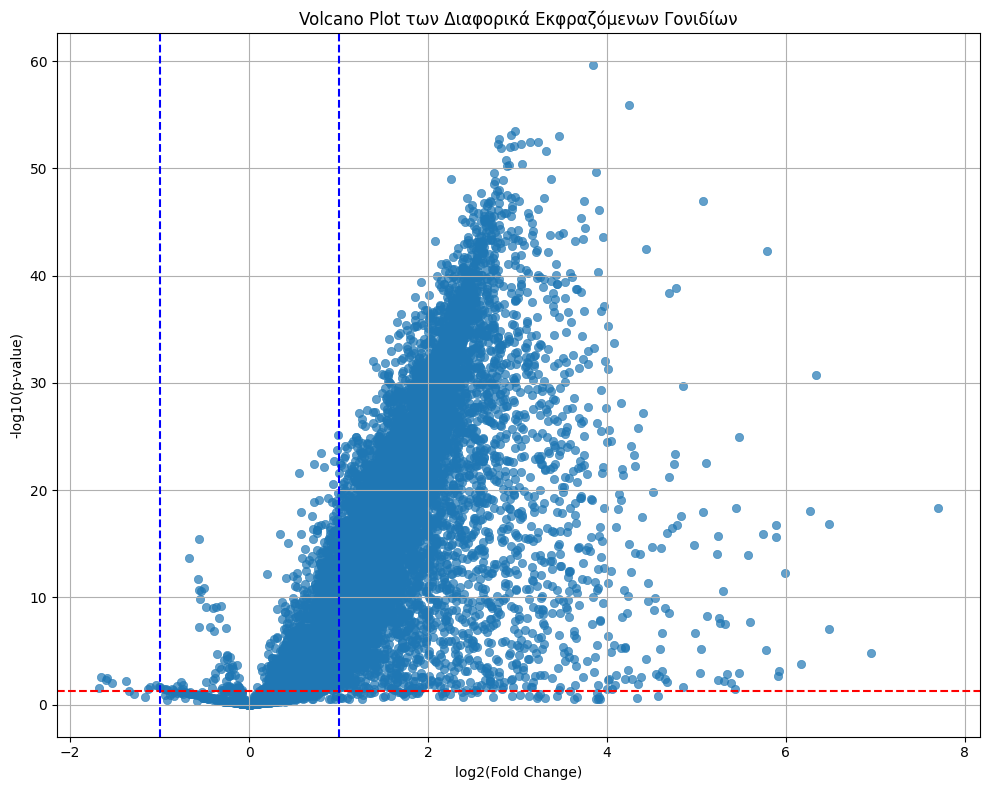

In [19]:
# Œ•œÄŒøŒªŒøŒ≥ŒπœÉŒºœåœÇ -log10(p-value)
deg_results['-log10(p-value)'] = -np.log10(deg_results['p-value'])

# Volcano plot
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=deg_results, 
    x='log2(Fold Change)', 
    y='-log10(p-value)',
    edgecolor=None, alpha=0.7
)

# ŒåœÅŒπŒ± œÉŒ∑ŒºŒ±ŒΩœÑŒπŒ∫œåœÑŒ∑œÑŒ±œÇ (œÄŒ±œÅŒ¨Œ¥ŒµŒπŒ≥ŒºŒ±)
plt.axhline(y=-np.log10(0.05), color='red', linestyle='--')
plt.axvline(x=1, color='blue', linestyle='--')
plt.axvline(x=-1, color='blue', linestyle='--')

plt.xlabel('log2(Fold Change)')
plt.ylabel('-log10(p-value)')
plt.title('Volcano Plot œÑœâŒΩ ŒîŒπŒ±œÜŒøœÅŒπŒ∫Œ¨ ŒïŒ∫œÜœÅŒ±Œ∂œåŒºŒµŒΩœâŒΩ ŒìŒøŒΩŒπŒ¥ŒØœâŒΩ')

plt.grid(True)
plt.tight_layout()
plt.show()

# Heatmap top 50 Œ≥ŒøŒΩŒØŒ¥ŒπŒ±

C:\Users\stama\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
C:\Users\stama\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


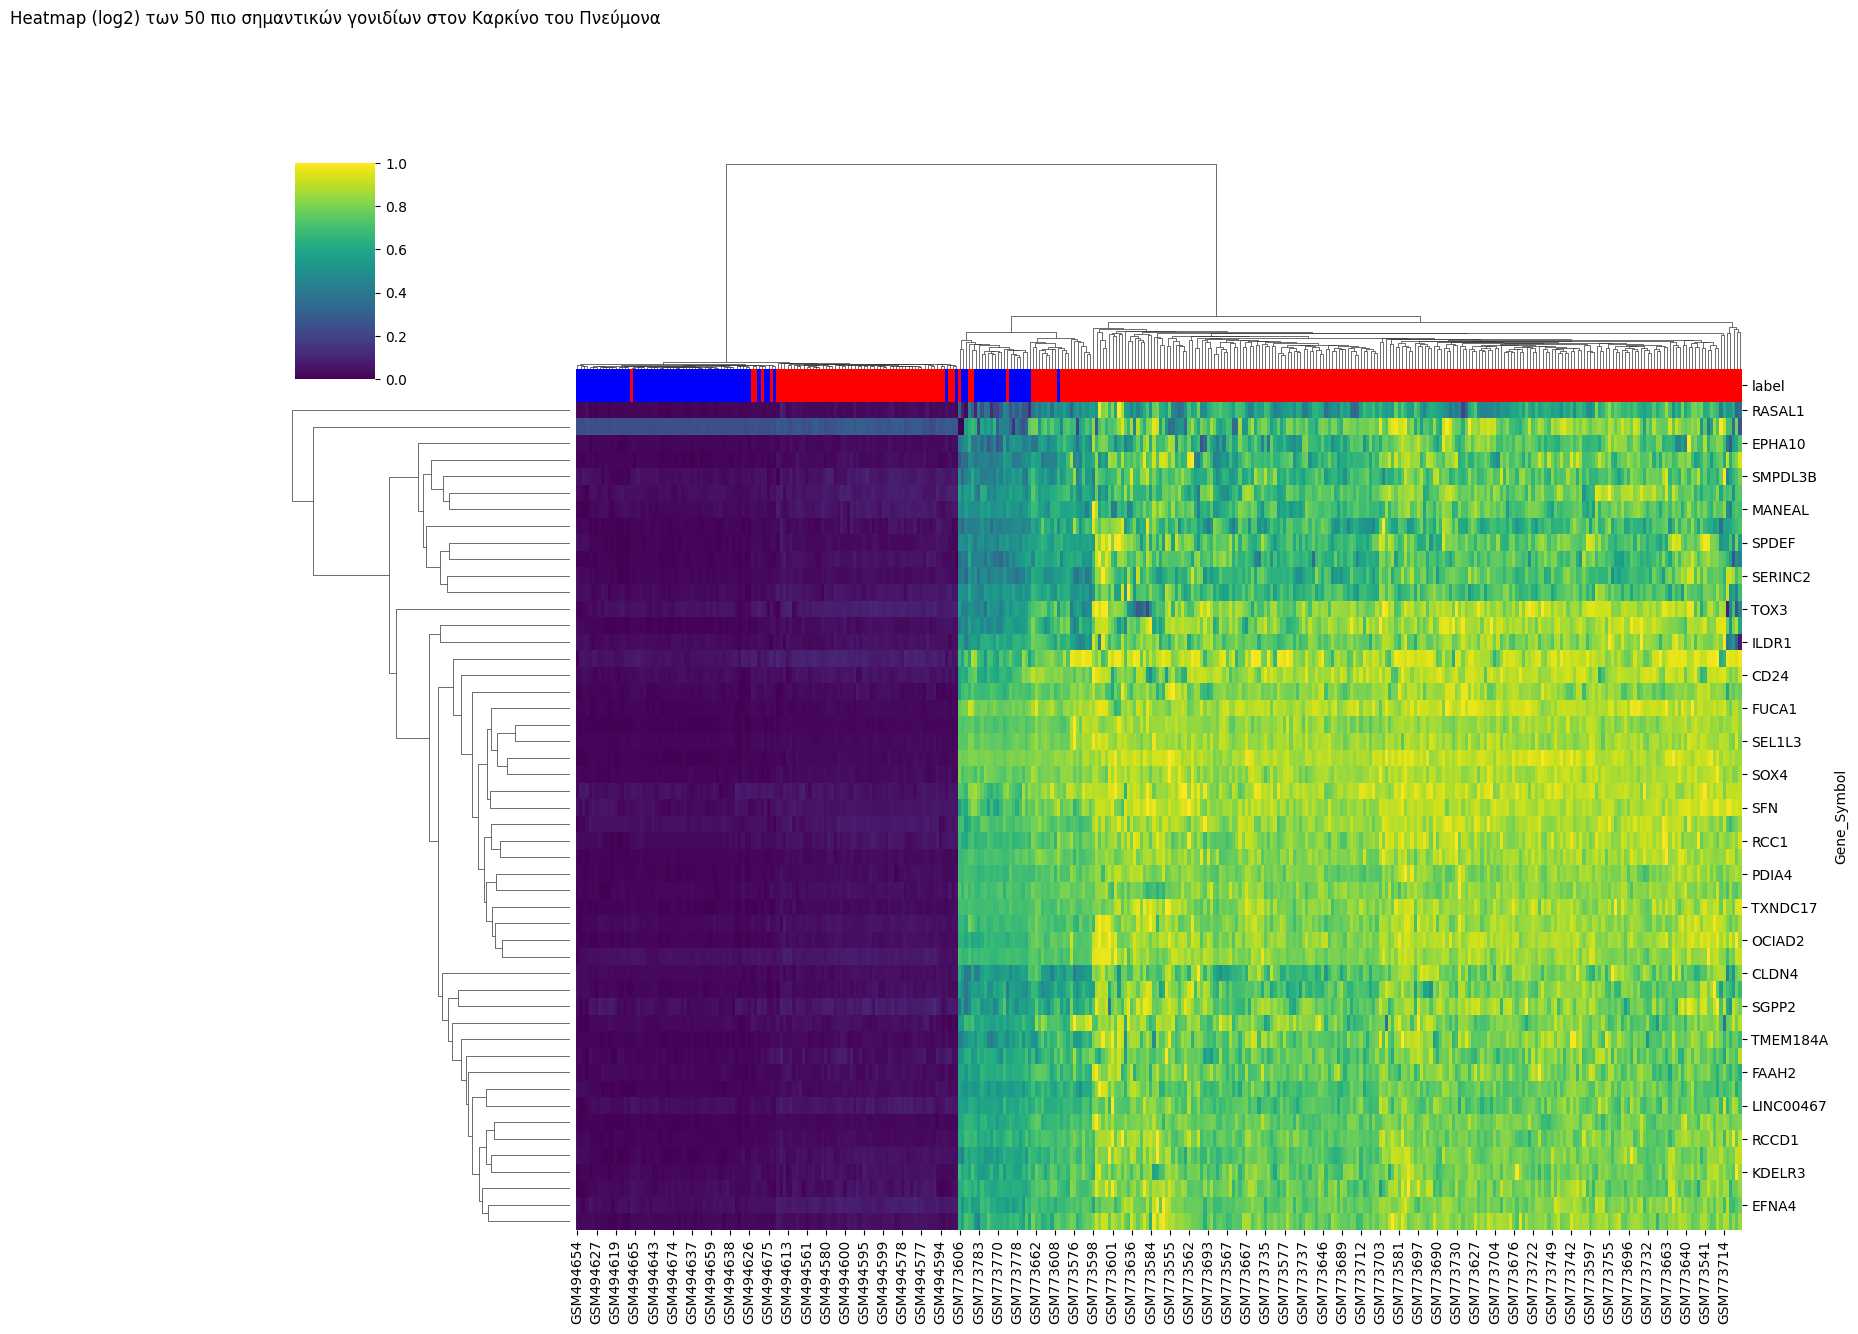

In [21]:
# Top 50 Œ≥ŒøŒΩŒØŒ¥ŒπŒ± ŒºŒµ Œ≤Œ¨œÉŒ∑ œÑŒø p-value
top_genes = deg_results.head(50)['Gene'].values

# ŒîŒ∑ŒºŒπŒøœÖœÅŒ≥ŒØŒ± œÖœÄŒøœÉœÖŒΩœåŒªŒøœÖ Œ¥ŒµŒ¥ŒøŒºŒ≠ŒΩœâŒΩ
heatmap_data = expression_data[top_genes.tolist() + ['label']]
heatmap_data_sorted = heatmap_data.sort_values('label')  

# ŒîŒπŒ±œáœâœÅŒØŒ∂ŒøœÖŒºŒµ labels Œ∫Œ±Œπ Œ¥ŒµŒ¥ŒøŒºŒ≠ŒΩŒ±
labels = heatmap_data_sorted.pop('label')

# ŒõŒøŒ≥Œ±œÅŒπŒ∏ŒºŒπŒ∫œåœÇ ŒºŒµœÑŒ±œÉœáŒ∑ŒºŒ±œÑŒπœÉŒºœåœÇ Œ¥ŒµŒ¥ŒøŒºŒ≠ŒΩœâŒΩ
heatmap_data_log = np.log2(heatmap_data_sorted + 1)

# ŒîŒ∑ŒºŒπŒøœÖœÅŒ≥ŒØŒ± œáœÅœâŒºŒ¨œÑœâŒΩ labels
label_colors = labels.map({'cancer': 'red', 'normal': 'blue'})

# ŒöŒ±Œ∏Œ±œÅœåœÑŒµœÅŒø heatmap
sns.clustermap(
    heatmap_data_log.transpose(),
    cmap='viridis',
    col_colors=label_colors,
    figsize=(16, 12),
    standard_scale=0  # Œ∫Œ±ŒΩŒøŒΩŒπŒ∫ŒøœÄŒøŒØŒ∑œÉŒ∑ Œ±ŒΩŒ¨ Œ≥ŒøŒΩŒØŒ¥ŒπŒø
)

plt.title('Heatmap (log2) œÑœâŒΩ 50 œÄŒπŒø œÉŒ∑ŒºŒ±ŒΩœÑŒπŒ∫œéŒΩ Œ≥ŒøŒΩŒπŒ¥ŒØœâŒΩ œÉœÑŒøŒΩ ŒöŒ±œÅŒ∫ŒØŒΩŒø œÑŒøœÖ Œ†ŒΩŒµœçŒºŒøŒΩŒ±', pad=100)
plt.show()

# MACHINE LEARNING BITCHES!!!!

# Œ†œÅŒøŒµœÑŒøŒπŒºŒ±œÉŒØŒ± Œ¥ŒµŒ¥ŒøŒºŒ≠ŒΩœâŒΩ

In [22]:
# ŒïœÄŒπŒªŒøŒ≥ŒÆ top 50 Œ≥ŒøŒΩŒπŒ¥ŒØœâŒΩ
top_genes = deg_results.head(50)['Gene'].tolist()

# Œ†œÅŒøŒµœÑŒøŒπŒºŒ±œÉŒØŒ± Œ¥ŒµŒ¥ŒøŒºŒ≠ŒΩœâŒΩ ML
X = expression_data[top_genes]
y = expression_data['label'].map({'cancer':1, 'normal':0})  # ŒºŒµœÑŒ±œÑœÅŒøœÄŒÆ œÉŒµ 0/1


# train/test set

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# ŒïŒ∫œÄŒ±ŒØŒ¥ŒµœÖœÉŒ∑ Random Forest

In [26]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# ŒëŒæŒπŒøŒªœåŒ≥Œ∑œÉŒ∑ ŒºŒøŒΩœÑŒ≠ŒªŒøœÖ

Accuracy: 0.97
AUC Score: 1.00
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        20
           1       1.00      0.96      0.98        72

    accuracy                           0.97        92
   macro avg       0.93      0.98      0.95        92
weighted avg       0.97      0.97      0.97        92



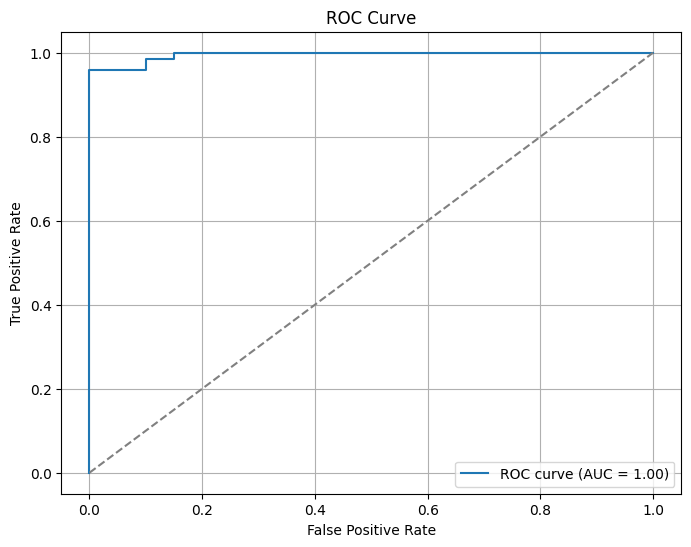

In [28]:
# Œ†œÅŒøŒ≤ŒªŒ≠œàŒµŒπœÇ
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:,1]

# ŒëŒæŒπŒøŒªœåŒ≥Œ∑œÉŒ∑
accuracy = accuracy_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_prob)
print(f"Accuracy: {accuracy:.2f}")
print(f"AUC Score: {auc_score:.2f}")
print(classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

# Feature Importance

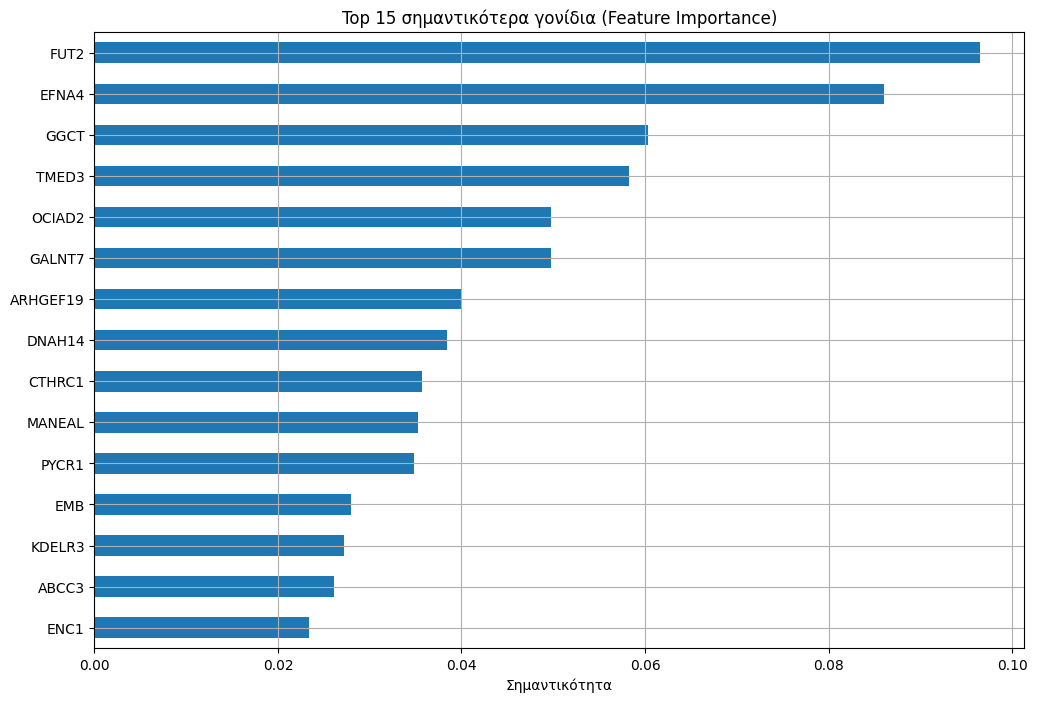

In [29]:
# Feature importances
importances = pd.Series(rf.feature_importances_, index=top_genes).sort_values(ascending=False)

# ŒüœÄœÑŒπŒ∫ŒøœÄŒøŒØŒ∑œÉŒ∑
plt.figure(figsize=(12,8))
importances.head(15).plot(kind='barh')
plt.title('Top 15 œÉŒ∑ŒºŒ±ŒΩœÑŒπŒ∫œåœÑŒµœÅŒ± Œ≥ŒøŒΩŒØŒ¥ŒπŒ± (Feature Importance)')
plt.gca().invert_yaxis()
plt.xlabel('Œ£Œ∑ŒºŒ±ŒΩœÑŒπŒ∫œåœÑŒ∑œÑŒ±')
plt.grid()
plt.show()
